In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
%matplotlib inline

In [2]:
np.seed(111)

def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        data = np.randint(low=25,high=1000,size=len(rng))
        
        status = [1,2,3]
        
        random_status = [status[np.randint(low=0, high=len(status))] for i in range(len(rng))]
        
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        
        random_states = [states[np.randint(low=0, high = len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [8]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [9]:
df.head()

,State,Status,CustomerCount,StatusDate
0,NY,3,635,2009-01-05
1,NJ,1,90,2009-01-12
2,NJ,3,315,2009-01-19
3,TX,3,919,2009-01-26
4,GA,2,897,2009-02-02


In [10]:
df.to_excel('Lesson3.xlsx', index=False)
print 'Done'

Done


In [23]:
Location = 'Lesson3.xlsx'

df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [24]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

In [25]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,3,635
2009-01-12,NJ,1,90
2009-01-19,NJ,3,315
2009-01-26,TX,3,919
2009-02-02,GA,2,897


In [26]:
df['State'].unique()

array([u'NY', u'NJ', u'TX', u'GA', u'FL', u'fl'], dtype=object)

In [27]:
df['State'] = df.State.apply(lambda x: x.upper())

In [28]:
df['State'].unique()

array([u'NY', u'NJ', u'TX', u'GA', u'FL'], dtype=object)

In [29]:
mask = df['Status'] == 1
df = df[mask]

In [30]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-12,NJ,1,90
2009-03-02,GA,1,828
2009-03-16,FL,1,426
2009-03-23,GA,1,391
2009-04-20,FL,1,457


In [31]:
mask = df['State'] == 'NJ'
df['State'][mask] = 'NY'

In [32]:
df['State'].unique()

array(['NY', u'GA', u'FL', u'TX'], dtype=object)

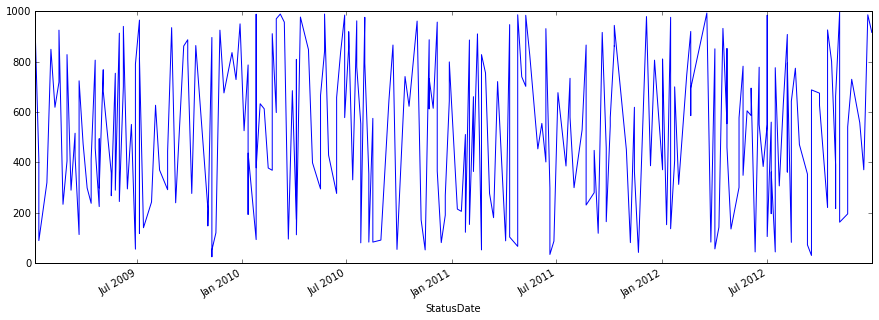

In [34]:
df['CustomerCount'].plot(figsize=(15,5));

In [35]:
sortdf = df[df['State'] =='NY'].sort(axis=0)
sortdf.head(10)

/Users/meredithnachman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,973
2009-01-12,NY,1,90
2009-01-12,NY,1,412
2009-01-26,NY,1,320
2009-02-09,NY,1,619
2009-02-16,NY,1,925
2009-02-23,NY,1,234
2009-03-23,NY,1,724
2009-04-13,NY,1,238


In [36]:
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-02-02       1            849
      2009-02-16       1            719
      2009-03-16       1            426
      2009-03-30       1            474
      2009-04-13       1            414

In [37]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-02-02            849
      2009-02-16            719
      2009-03-16            426
      2009-03-30            474
      2009-04-13            414

In [39]:
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-16 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-14 00:00:00, 2009-12-21 00:00:00, 2009-12-28 00:00:00, 2010-01-04 00:00:00, 2010-

In [40]:
Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

In [41]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-26', '2009-02-02',
               '2009-02-09', '2009-02-16', '2009-02-23', '2009-03-02',
               '2009-03-09', '2009-03-16',
               ...
               '2012-10-15', '2012-10-22', '2012-10-29', '2012-11-05',
               '2012-11-19', '2012-11-26', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=172, freq=None)

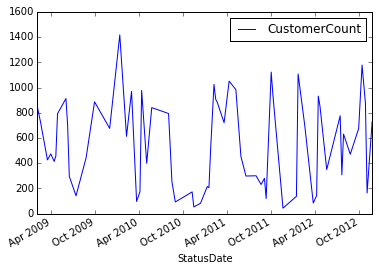

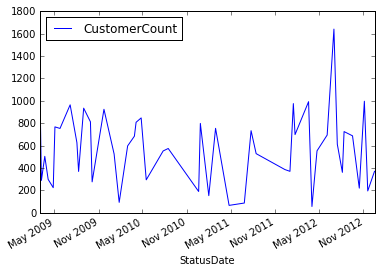

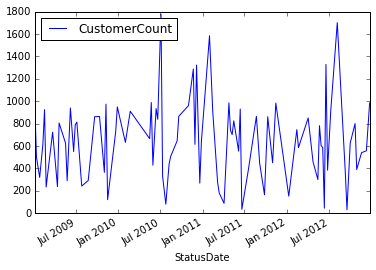

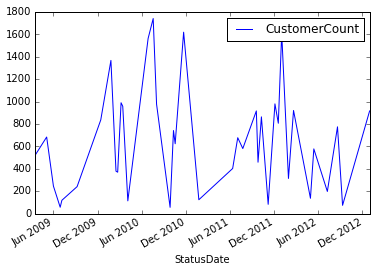

In [42]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

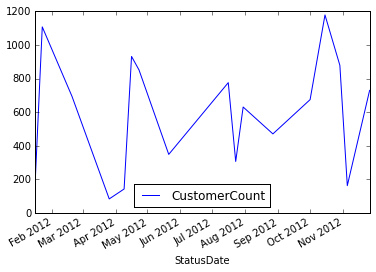

In [43]:
Daily.loc['FL']['2012':].plot();

In [46]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper'])

Daily = Daily[Daily['Outlier'] == False]

In [48]:
Daily.head(20)

CustomerCount    Lower     Upper Outlier
State StatusDate                                          
FL    2009-02-02            849  278.250  1289.750   False
      2009-02-16            719  278.250  1289.750   False
      2009-03-16            426  183.000   717.000   False
      2009-03-30            474  183.000   717.000   False
      2009-04-13            414  -66.500  1127.000   False
      2009-04-20            457  -66.500  1127.000   False
      2009-04-27            793  -66.500  1127.000   False
      2009-06-01            913 -214.500  1519.500   False
      2009-06-08            701 -214.500  1519.500   False
      2009-06-15            295 -214.500  1519.500   False
      2009-07-13            141   70.500   211.500   False
      2009-08-24            444  222.000   666.000   False
      2009-09-28            887  443.500  1330.500   False
      2009-11-30            676  338.000  1014.000   False
      2010-01-11           1418  709.000  2127.000   False
      2010-02-08            613  306.500   919.500   False
      2010-03-01            970 -498.250  1564.250   False
      2010-03-22             96 -498.250  1564.250   False
      2010-04-05            174 -414.875  1565.875   False
      2010-04-12            977 -414.875  1565.875   False

In [51]:
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount']

YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,973,973
2009-01-12,502,973
2009-01-26,320,973
2009-02-02,849,1644
2009-02-09,619,1644


In [52]:
data = [1000, 2000, 3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [53]:
combined = pd.concat([ALL, BHAG], axis=0)
combined = combined.sort(axis=0)
combined.tail()

/Users/meredithnachman/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from IPython.kernel.zmq import kernelapp as app


,BHAG,CustomerCount,Max
2012-12-17,NaN,371,986
2012-12-24,NaN,986,986
2012-12-31,NaN,916,986
2012-12-31,2000,NaN,NaN
2013-12-31,3000,NaN,NaN
